In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder

In [2]:
df=pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [7]:
df.isnull().sum()


Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [9]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [10]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [12]:
df['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [13]:
df=df.drop(['Case_No','Who completed the test'],axis=1)

In [15]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [17]:
la = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for cols in columns:
    df[cols] = la.fit_transform(df[cols])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Qchat-10-Score       1054 non-null   int64
 12  Sex                  1054 non-null   int32
 13  Ethnicity            1054 non-null   int32
 14  Jaundice             1054 non-null   int32
 15  Family_mem_with_ASD  1054 non-null   int32
 16  Class/ASD Traits     105

In [19]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,0,5,0,1,0
1050,0,0,1,1,1,0,1,0,1,0,12,5,1,7,1,0,1
1051,1,0,1,1,1,1,1,1,1,1,18,9,1,8,1,0,1
1052,1,0,0,0,0,0,0,1,0,1,19,3,1,5,0,1,0


<Axes: >

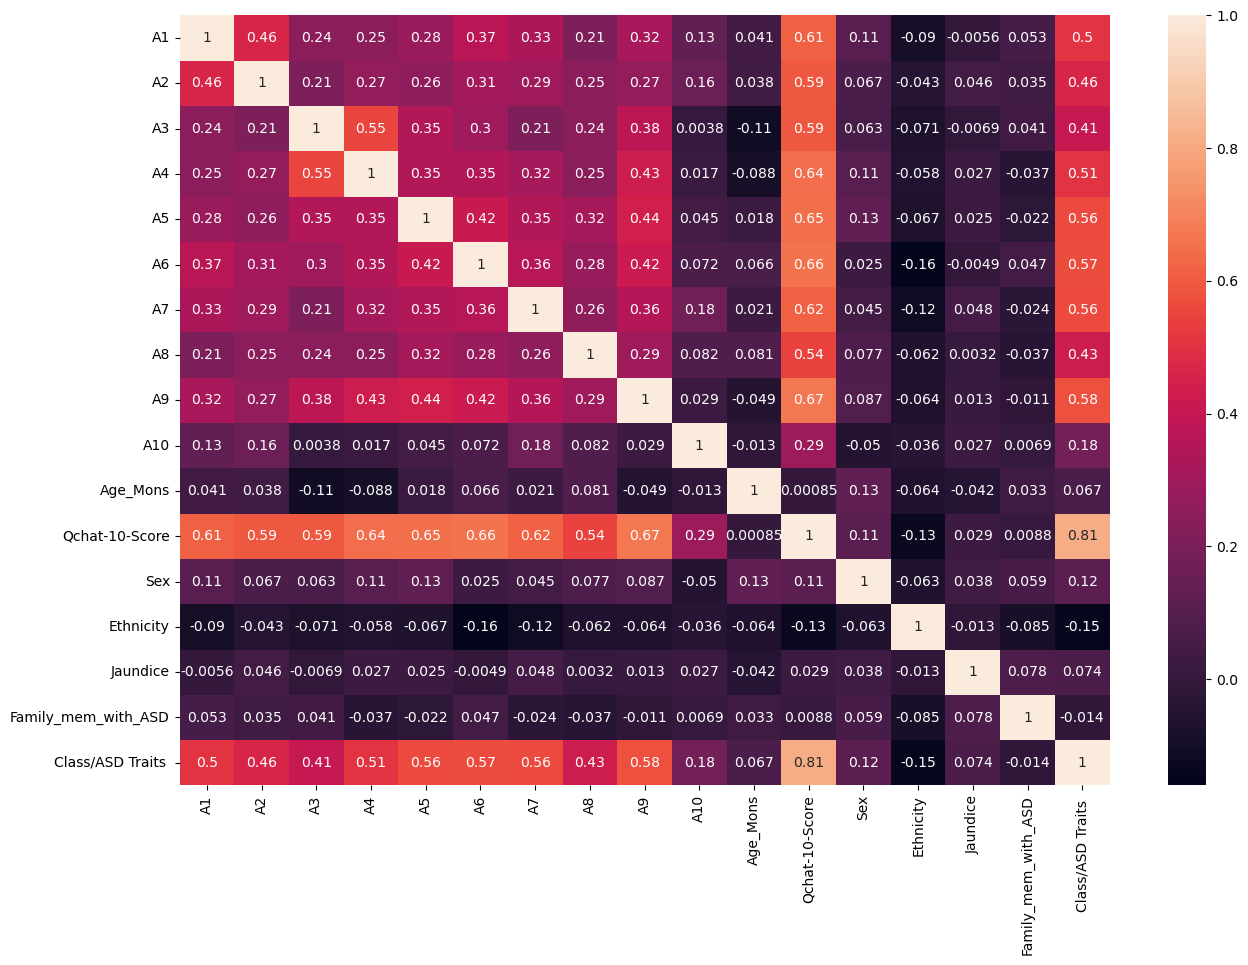

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
df['Qchat-10-Score'].value_counts()

7     135
5     120
4     110
8      97
3      96
6      96
9      95
2      88
1      88
10     75
0      54
Name: Qchat-10-Score, dtype: int64

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

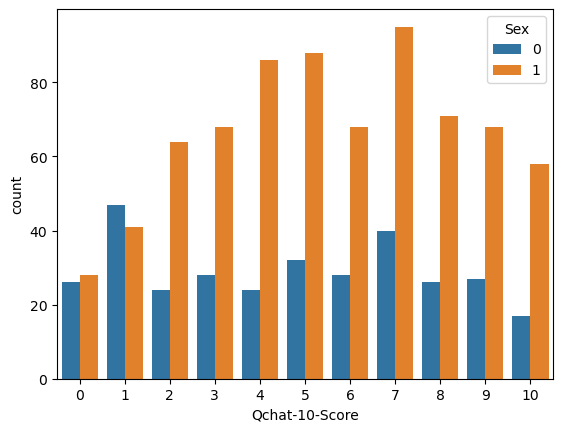

In [26]:
sns.countplot(data=df,x='Qchat-10-Score',hue='Sex')

<Axes: xlabel='Jaundice', ylabel='count'>

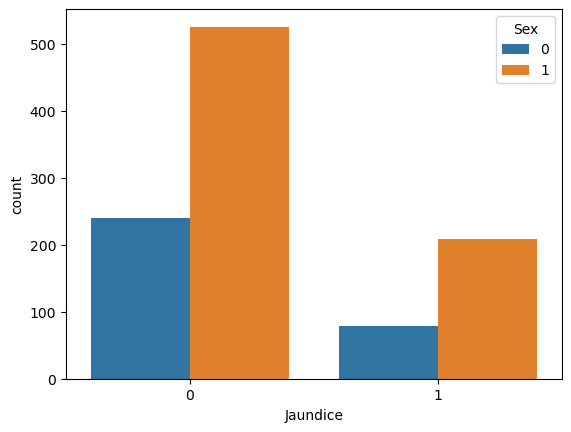

In [33]:
sns.countplot(data=df,x='Jaundice',hue='Sex')

<Axes: xlabel='Ethnicity', ylabel='count'>

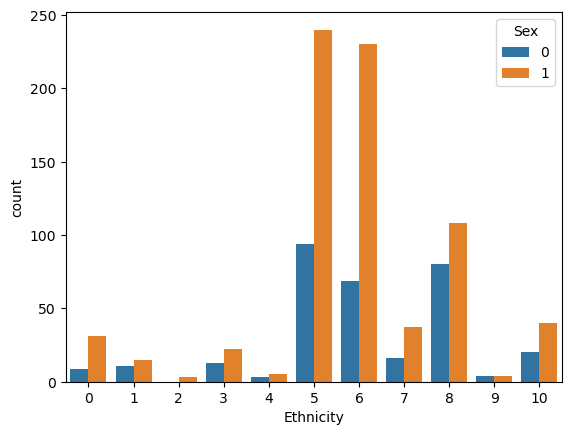

In [34]:
sns.countplot(data=df,x='Ethnicity',hue='Sex')

In [32]:
X = df.drop(['Class/ASD Traits '], axis = 1)      
Y = df['Class/ASD Traits ']                      
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
model = DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
base_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

In [45]:
print(accuracy_score(y_test,base_pred))

1.0


In [47]:
# model.save('model.h5')

In [48]:
import pickle
